<a href="https://colab.research.google.com/github/DiegoCarrillo19/rotavirus-database-analysis/blob/main/An%C3%A1lisis_descriptivo_secuencias_rotavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
%matplotlib inline

In [ ]:
#cargar dataframes
data = pd.read_csv('Rotavirus database.csv')
data.head()

,accession,length,type,genotype,host,country,isolation,collection_date,release_date,name
0,AB573074,1476,NSP1,A13,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP1 gene for non-structura...
1,AB573075,954,NSP2,N2,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP2 gene for non-structura...
2,AB573076,942,NSP3,T9,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP3 gene for non-structura...
3,AB573077,528,NSP4,E2,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP4 gene for non-structura...
4,AB573078,597,NSP5/6,H3,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP5 gene for non-structura...


In [ ]:
#Data cleaning
data.dropna()
data.head()

,accession,length,type,genotype,host,country,isolation,collection_date,release_date,name
0,AB573074,1476,NSP1,A13,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP1 gene for non-structura...
1,AB573075,954,NSP2,N2,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP2 gene for non-structura...
2,AB573076,942,NSP3,T9,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP3 gene for non-structura...
3,AB573077,528,NSP4,E2,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP4 gene for non-structura...
4,AB573078,597,NSP5/6,H3,Bos taurus,Japan,feces,2008/06,2010/07/28,Bovine rotavirus A NSP5 gene for non-structura...


In [ ]:
#Determinar la frecuencia de las diferentes columnas de la base de datos
Gen = data['type'].value_counts()
Host = data['host'].value_counts()
Pais = data['country'].value_counts()
Fecha = data['collection_date'].value_counts()  

USA                                 2046
Australia                           1104
South Africa                         949
Canada                               689
Belgium                              662
China                                461
India                                310
Thailand                             296
Italy                                213
Japan                                165
Ethiopia                             108
Togo                                 107
Zimbabwe                             100
Nicaragua                             93
Zambia                                93
Kenya                                 87
South Korea                           83
Spain                                 82
Bangladesh                            73
Argentina                             66
Cameroon                              65
Democratic Republic of the Congo      64
Myanmar                               62
Senegal                               53
Uganda          

<Axes: >

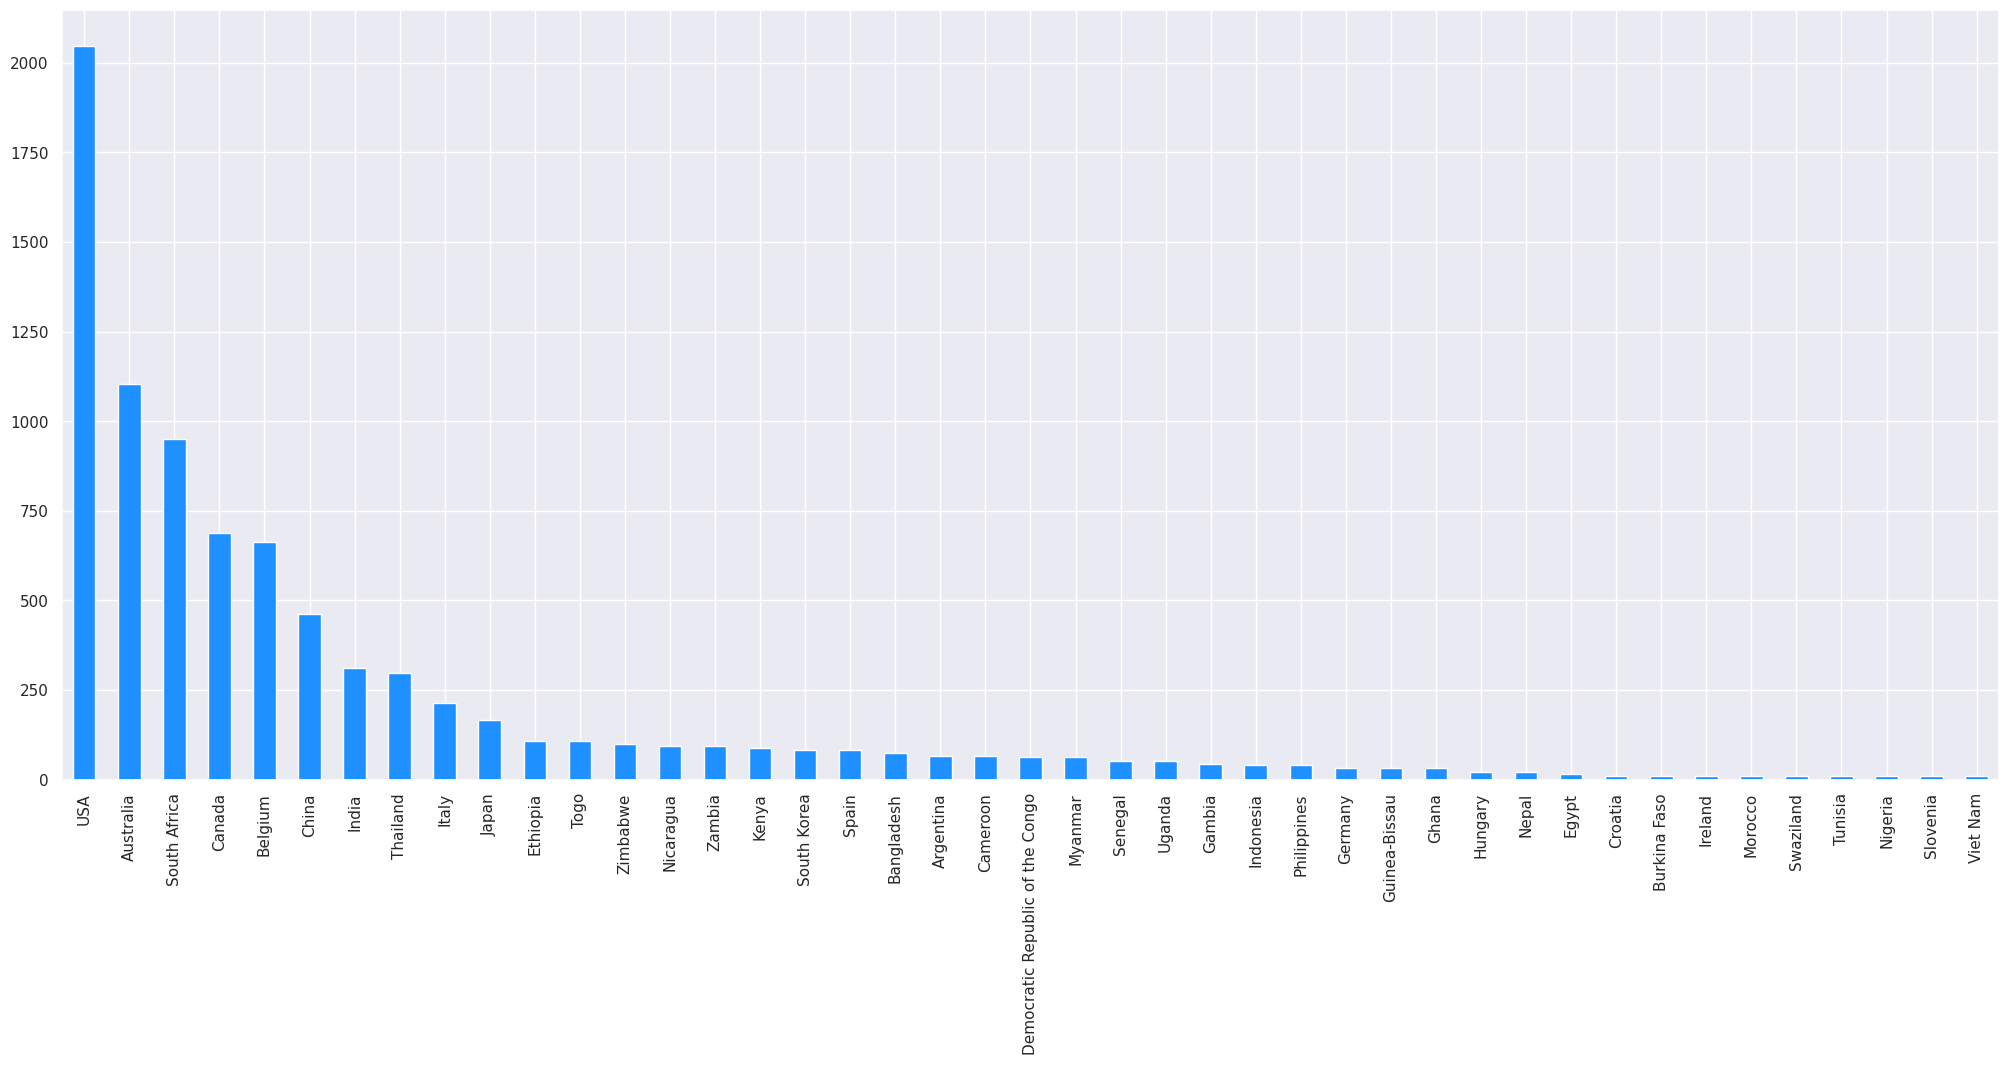

In [ ]:
#Visualizacion del origen de las secuencias 
print (Pais)
sns.set_theme()
Pais.plot(kind = 'bar', color = 'dodgerblue', figsize=(25, 10)) 
 

In [ ]:
#Frecuencia de los paises en el total de las secuencias
Pais = Pais.rename_axis("Pais")
Pais = Pais.reset_index(name= "Frecuencia")
Pais


,Pais,Frecuencia
0,USA,2046
1,Australia,1104
2,South Africa,949
3,Canada,689
4,Belgium,662
5,China,461
6,India,310
7,Thailand,296
8,Italy,213
9,Japan,165


In [ ]:
#generar el codigo de tres letras
!pip install pycountry
import pycountry
def get_alpha_3(location):
    try:
        return pycountry.countries.get (name=location).alpha_3
    except:
        return None
        
Pais ['Code']= Pais['Pais'].apply(lambda x: get_alpha_3(x))
print (Pais.head)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<bound method NDFrame.head of                                 Pais  Frecuencia  Code
0                                USA        2046  None
1                          Australia        1104   AUS
2                       South Africa         949   ZAF
3                             Canada         689   CAN
4                            Belgium         662   BEL
5                              China         461   CHN
6                              India         310   IND
7                           Thailand         296   THA
8                              Italy         213   ITA
9                              Japan         165   JPN
10                          Ethiopia         108   ETH
11                              Togo         107   TGO
12                          Zimbabwe         100   ZWE
13                         Nicaragua          93   NIC
14                            Zambia          

In [ ]:
#Cambiar manual a codigo de tres letras
Pais.at[0,'Code']= "USA"
Pais.at[16,'Code']= "PRK"
Pais.at[21,'Code']= "COD"
Pais.at[38,'Code']= "SWZ"
Pais

,Pais,Frecuencia,Code
0,USA,2046,USA
1,Australia,1104,AUS
2,South Africa,949,ZAF
3,Canada,689,CAN
4,Belgium,662,BEL
5,China,461,CHN
6,India,310,IND
7,Thailand,296,THA
8,Italy,213,ITA
9,Japan,165,JPN


In [ ]:
#Vizualizar los datos en choropleth
import plotly.express as px
fig = px.choropleth(Pais,locations='Code',
                    color='Frecuencia',
                    hover_name='Code', 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

<Axes: >

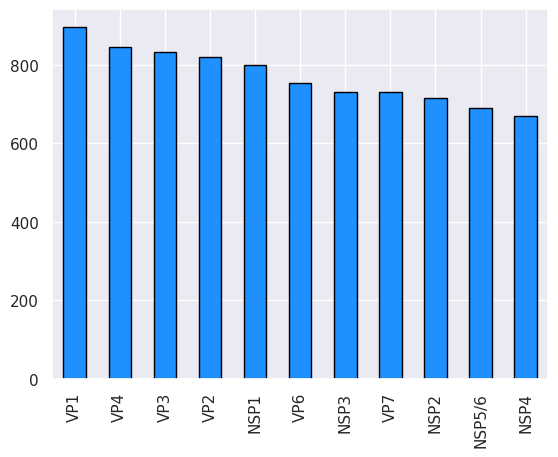

In [ ]:
#Frecuencia de los diferentes genes de rotavirus en la base de datos
sns.set_theme()
data['type'].value_counts().plot(kind='bar',color = 'dodgerblue',edgecolor = 'black')

In [ ]:
#Manipulacion de los genes de rotavirus, sus genotipos y frecuencia
genotypes_frequency = data.groupby ('type')	['genotype'].value_counts()


genotypes_frequency.to_frame()


genotype
type genotype                   
NSP1 A1                      596
     A2                      142
     A3                       22
     A8                       11
     A11                       8
...                          ...
VP7  G19                       1
     G23                       1
     G28                       1
     G7                        1
     genotype: G12P[6]         1

[129 rows x 1 columns]

In [ ]:
frecuencia_de_genotipos = genotypes_frequency.unstack(level='genotype')
frecuencia_de_genotipos

genotype,A1,A10,A11,A13,A15,A16,A2,A24,A3,A5,...,T16,T2,T3,T4,T5,T6,T7,T8,T9,genotype: G12P[6]
type,,,,,,,,,,,,,,,,,,,,,
NSP1,596.0,6.0,8.0,4.0,1.0,3.0,142.0,1.0,22.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
NSP2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
NSP3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,127.0,14.0,2.0,2.0,27.0,2.0,1.0,2.0,1.0
NSP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
NSP5/6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
VP1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
VP2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
VP3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
VP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
#Limpieza de los datos de NSP1
NSP1 = frecuencia_de_genotipos.iloc[0,:]
NSP1 = NSP1.rename_axis("Genotipo")
NSP1 = NSP1.reset_index(name= "Frecuencia")
NSP1limpio = NSP1.dropna(axis=1)
NSP1limpio = NSP1.dropna(axis=0)


Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia NSP1')

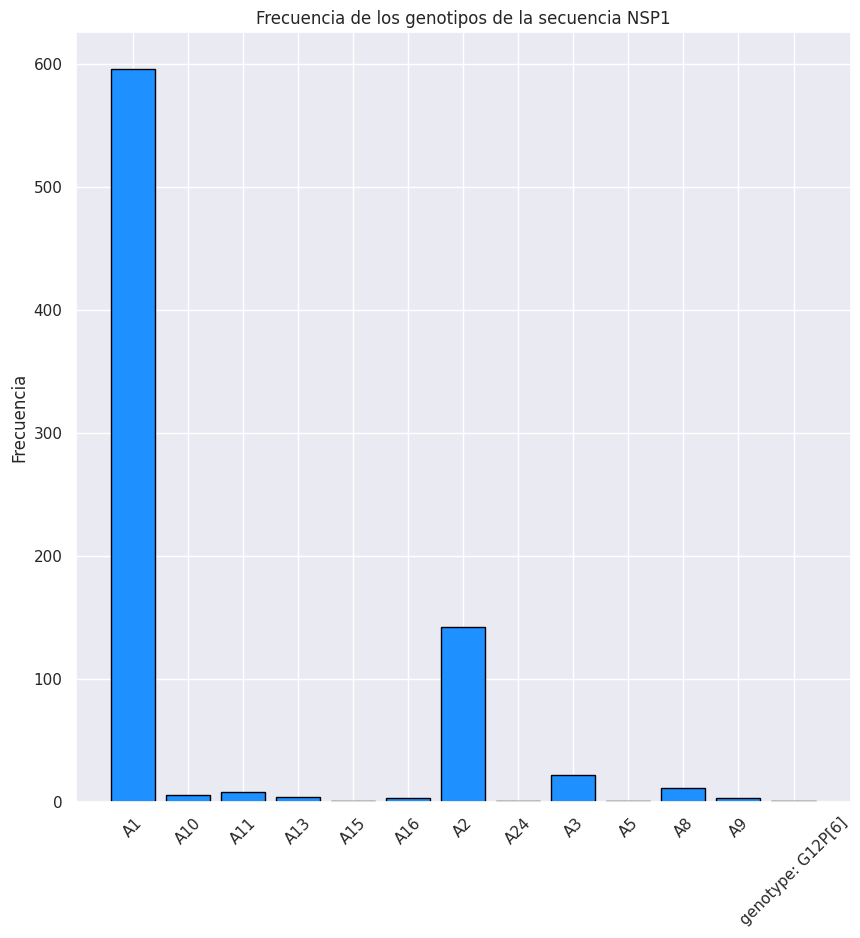

In [ ]:
#Grafico de barras de los genotipos de NSP1
sns.set_theme()
x_values = NSP1limpio['Genotipo']
y_values = NSP1limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia NSP1')


In [ ]:
#Limpieza de los datos de NSP2
NSP2 = frecuencia_de_genotipos.iloc[1,:]
NSP2 = NSP2.rename_axis("Genotipo")
NSP2 = NSP2.reset_index(name= "Frecuencia")
NSP2limpio = NSP2.dropna(axis=1)
NSP2limpio = NSP2.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia NSP2')

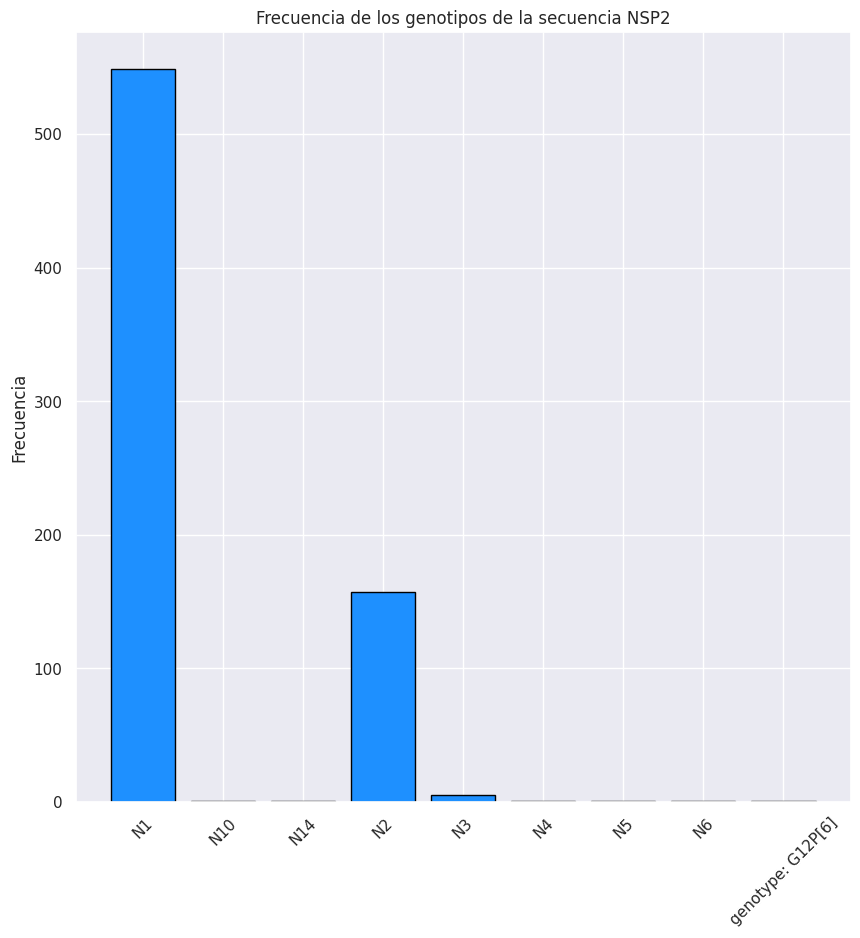

In [ ]:
#Grafico de barras de los genotipos de NSP2
sns.set_theme()
x_values = NSP2limpio['Genotipo']
y_values = NSP2limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia NSP2')

In [ ]:
#Limpieza de los datos de NSP3
NSP3 = frecuencia_de_genotipos.iloc[2,:]
NSP3 = NSP3.rename_axis("Genotipo")
NSP3 = NSP3.reset_index(name= "Frecuencia")
NSP3limpio = NSP3.dropna(axis=1)
NSP3limpio = NSP3.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia NSP3')

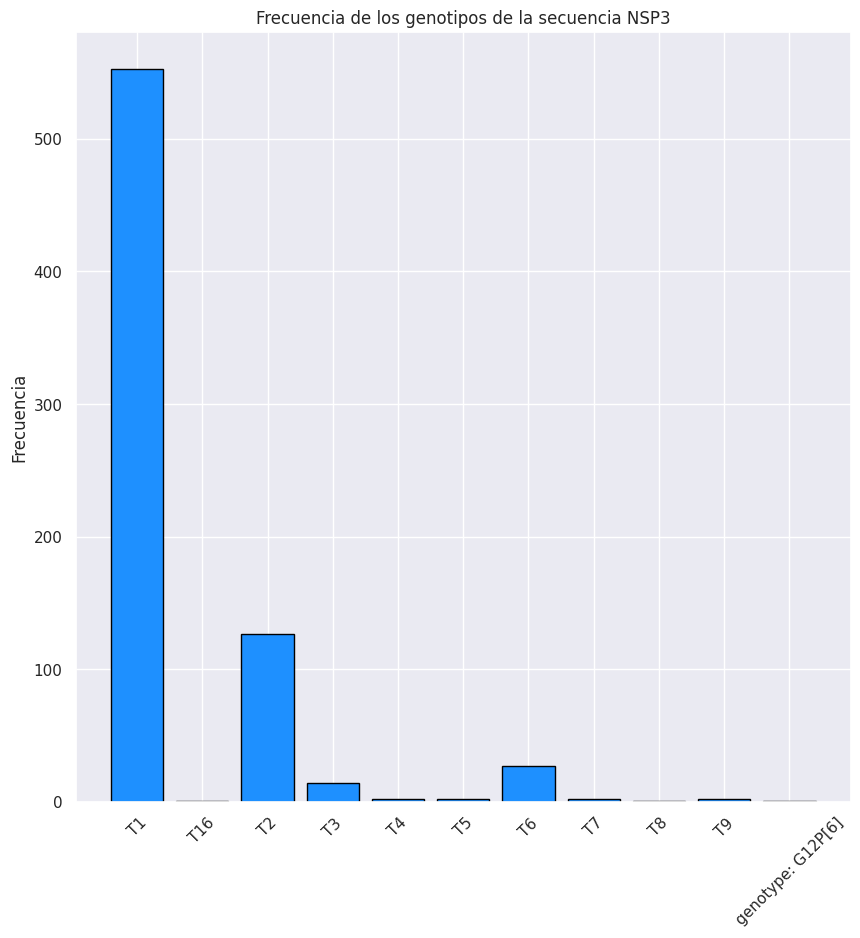

In [ ]:
#Grafico de barras de los genotipos de NSP3
sns.set_theme()
x_values = NSP3limpio['Genotipo']
y_values = NSP3limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia NSP3')

In [ ]:
#Limpieza de los datos de NSP4
NSP4 = frecuencia_de_genotipos.iloc[3,:]
NSP4 = NSP4.rename_axis("Genotipo")
NSP4 = NSP4.reset_index(name= "Frecuencia")
NSP4limpio = NSP4.dropna(axis=1)
NSP4limpio = NSP4.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia NSP4')

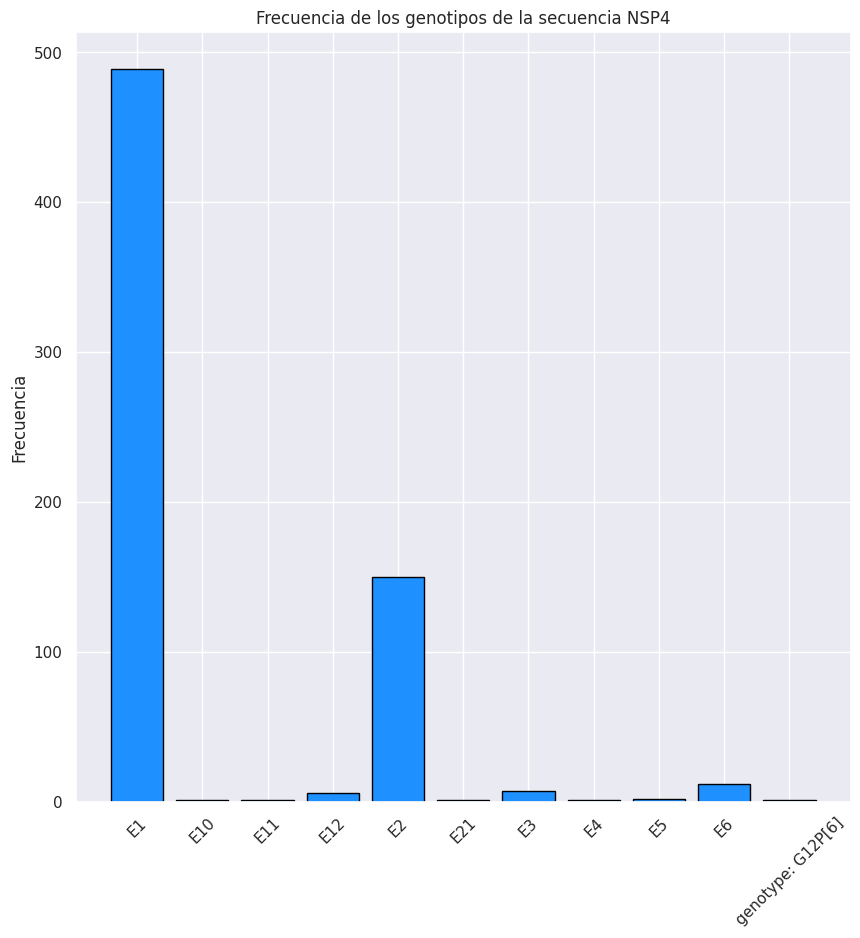

In [ ]:
#Grafico de barras de los genotipos de NSP4
sns.set_theme()
x_values = NSP4limpio['Genotipo']
y_values = NSP4limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia NSP4')

In [ ]:
#Limpieza de los datos de NSP5/6
NSP5 = frecuencia_de_genotipos.iloc[4,:]
NSP5 = NSP5.rename_axis("Genotipo")
NSP5 = NSP5.reset_index(name= "Frecuencia")
NSP5limpio = NSP5.dropna(axis=1)
NSP5limpio = NSP5.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia NSP5/6')

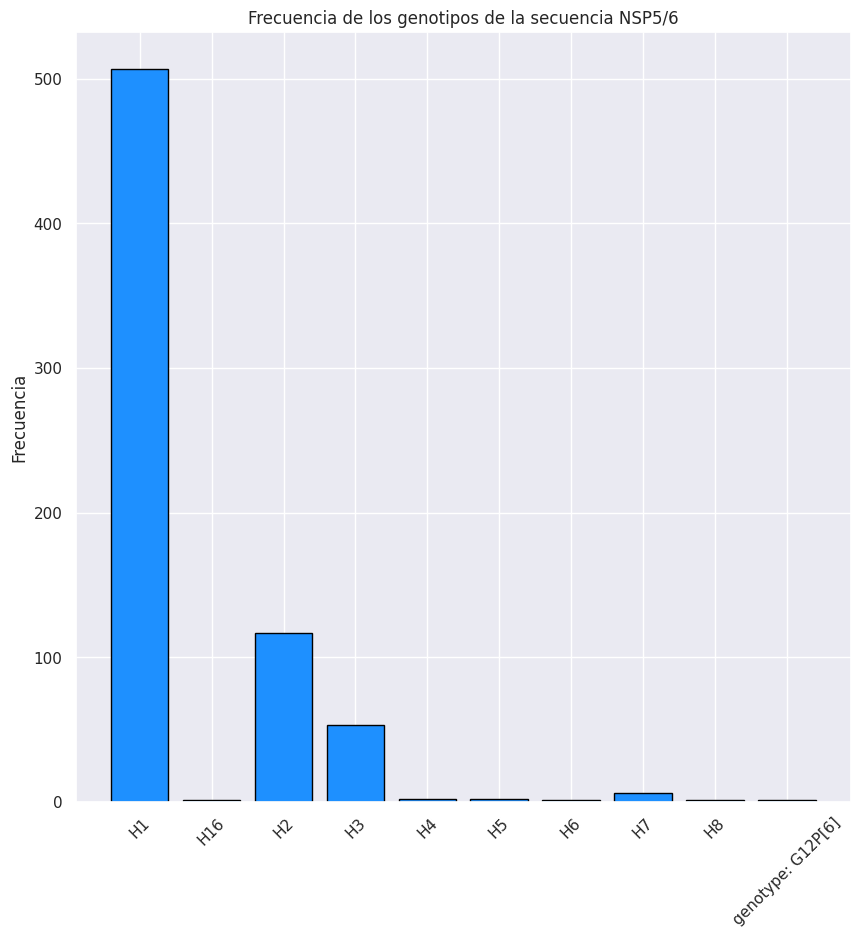

In [ ]:
#Grafico de barras de los genotipos de NSP5/6
sns.set_theme()
x_values = NSP5limpio['Genotipo']
y_values = NSP5limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia NSP5/6')

In [ ]:
#Limpieza de los datos de VP1
VP1 = frecuencia_de_genotipos.iloc[5,:]
VP1 = VP1.rename_axis("Genotipo")
VP1 = VP1.reset_index(name= "Frecuencia")
VP1limpio = VP1.dropna(axis=1)
VP1limpio = VP1.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia VP1')

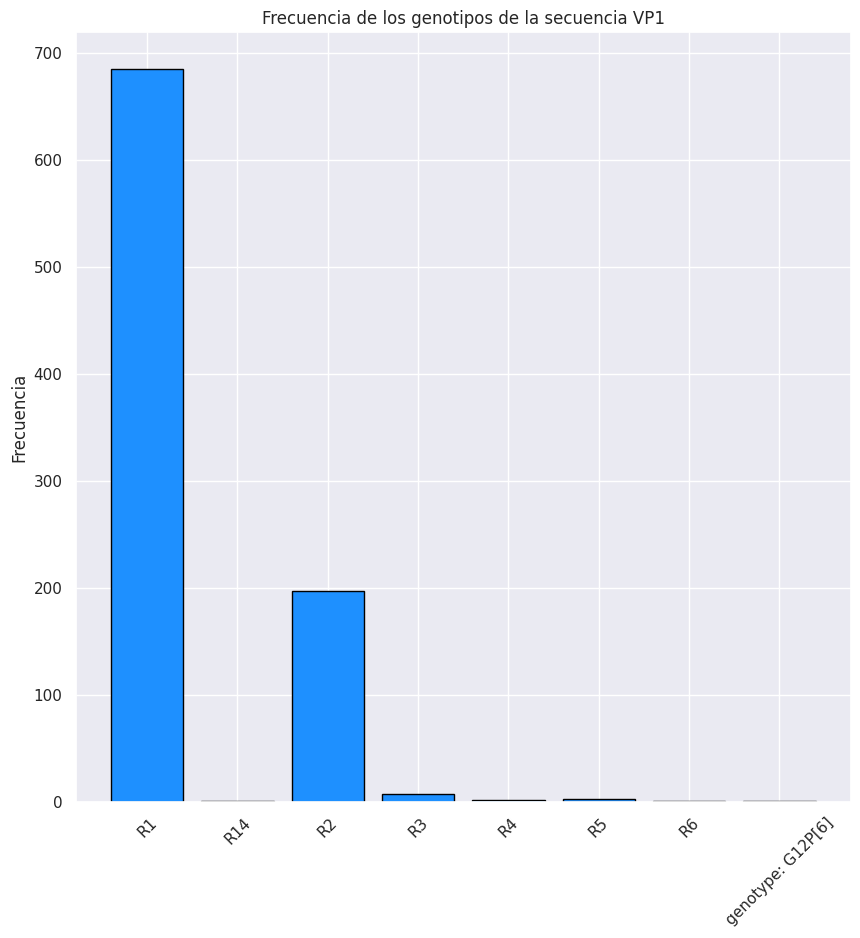

In [ ]:
#Grafico de barras de los genotipos de VP1
sns.set_theme()
x_values = VP1limpio['Genotipo']
y_values = VP1limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia VP1')

In [ ]:
#Limpieza de los datos de VP2
VP2 = frecuencia_de_genotipos.iloc[6,:]
VP2 = VP2.rename_axis("Genotipo")
VP2 = VP2.reset_index(name= "Frecuencia")
VP2limpio = VP2.dropna(axis=1)
VP2limpio = VP2.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia VP1')

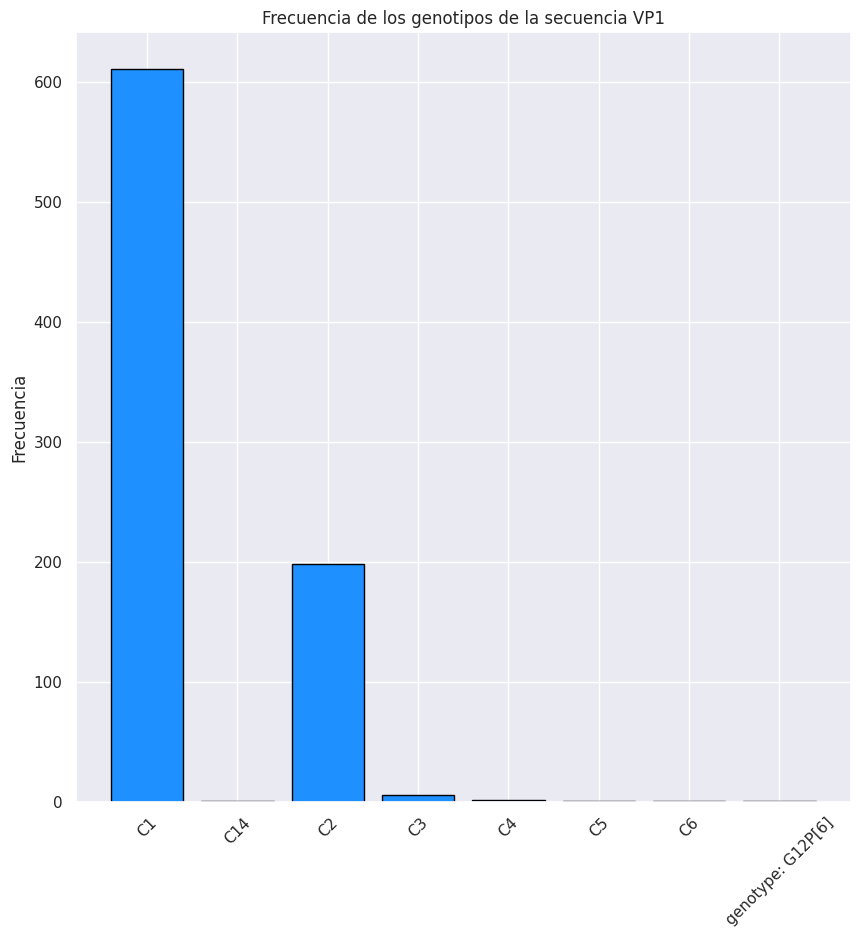

In [ ]:
#Grafico de barras de los genotipos de VP2
sns.set_theme()
x_values = VP2limpio['Genotipo']
y_values = VP2limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia VP1')

In [ ]:
#Limpieza de los datos de VP3
VP3 = frecuencia_de_genotipos.iloc[7,:]
VP3 = VP3.rename_axis("Genotipo")
VP3 = VP3.reset_index(name= "Frecuencia")
VP3limpio = VP3.dropna(axis=1)
VP3limpio = VP3.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia VP3')

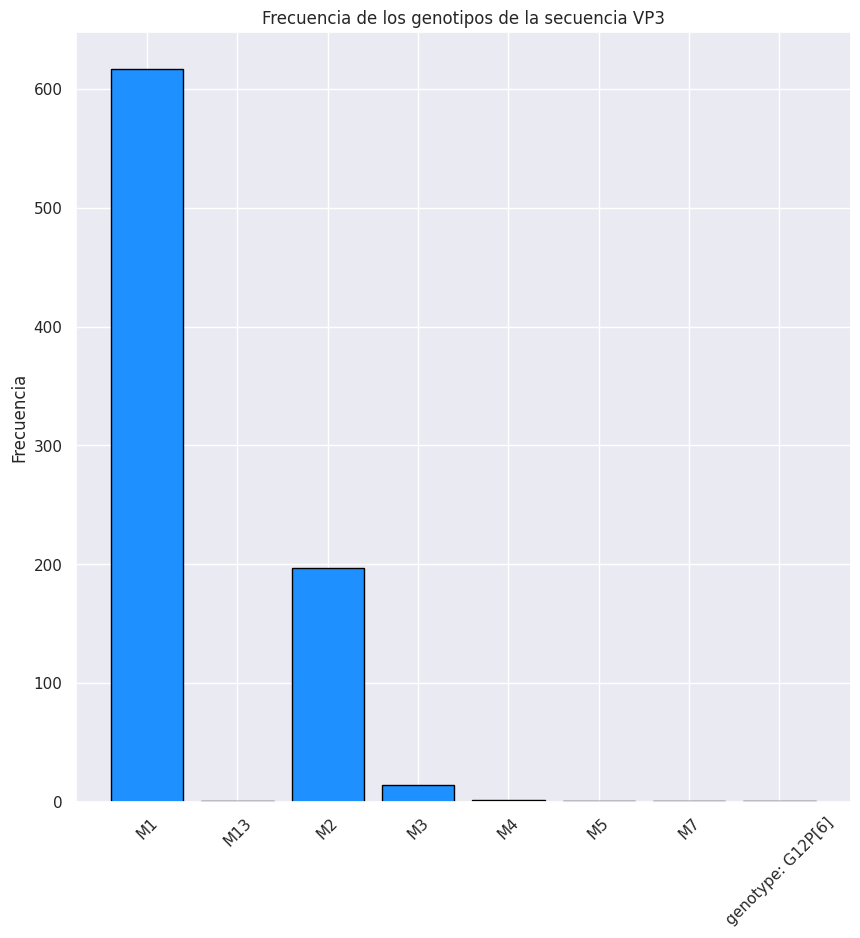

In [ ]:
#Grafico de barras de los genotipos de VP3
sns.set_theme()
x_values = VP3limpio['Genotipo']
y_values = VP3limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia VP3')

In [ ]:
#Limpieza de los datos de VP4
VP4 = frecuencia_de_genotipos.iloc[8,:]
VP4 = VP4.rename_axis("Genotipo")
VP4 = VP4.reset_index(name= "Frecuencia")
VP4limpio = VP4.dropna(axis=1)
VP4limpio = VP4.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia VP4')

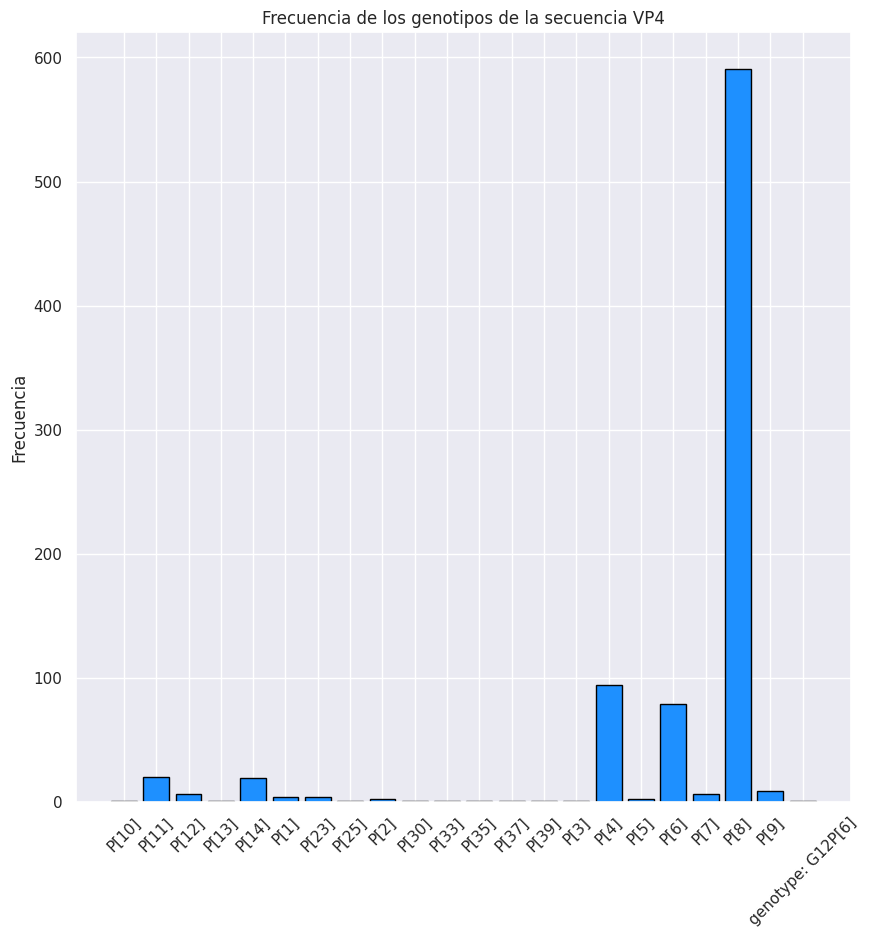

In [ ]:
#Grafico de barras de los genotipos de VP4
sns.set_theme()
x_values = VP4limpio['Genotipo']
y_values = VP4limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia VP4')

In [ ]:
#Limpieza de los datos de VP6
VP6 = frecuencia_de_genotipos.iloc[9,:]
VP6 = VP6.rename_axis("Genotipo")
VP6 = VP6.reset_index(name= "Frecuencia")
VP6limpio = VP6.dropna(axis=1)
VP6limpio = VP6.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia VP6')

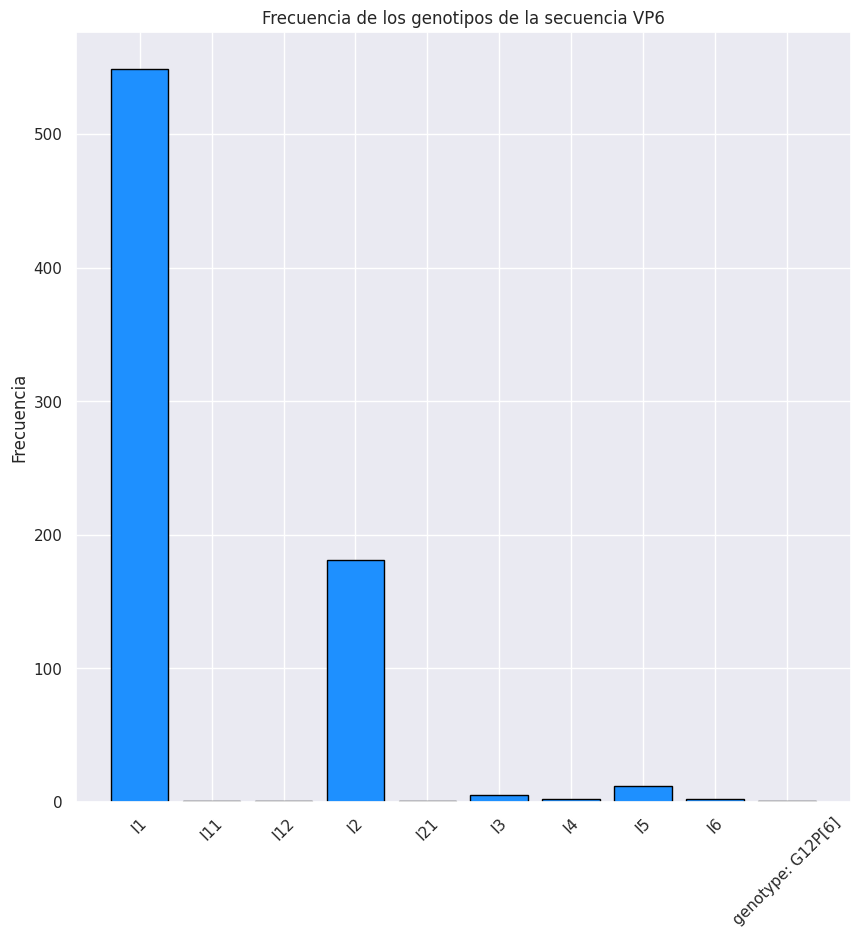

In [ ]:
#Grafico de barras de los genotipos de VP6
sns.set_theme()
x_values = VP6limpio['Genotipo']
y_values = VP6limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia VP6')

In [ ]:
#Limpieza de los datos de VP7
VP7 = frecuencia_de_genotipos.iloc[10,:]
VP7 = VP7.rename_axis("Genotipo")
VP7 = VP7.reset_index(name= "Frecuencia")
VP7limpio = VP7.dropna(axis=1)
VP7limpio = VP7.dropna(axis=0)

Text(0.5, 1.0, 'Frecuencia de los genotipos de la secuencia VP7')

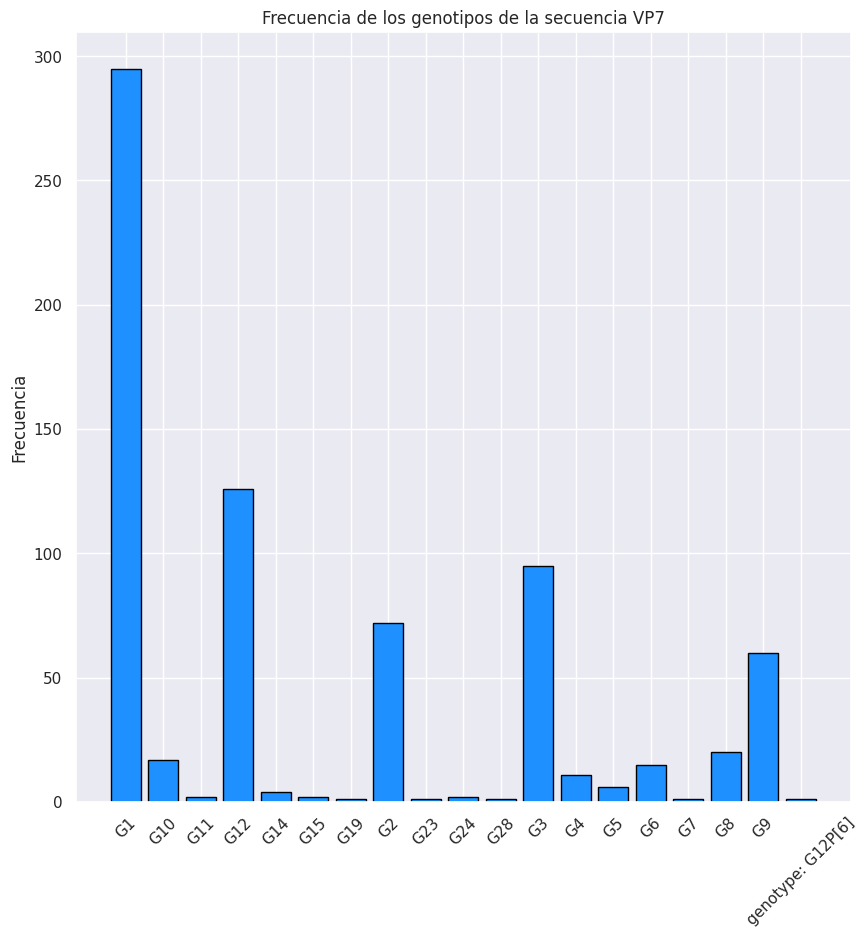

In [ ]:
#Grafico de barras de los genotipos de VP7
sns.set_theme()
x_values = VP7limpio['Genotipo']
y_values = VP7limpio['Frecuencia']
plt.figure (figsize =(10,10))

plt.bar(x_values, y_values, color = 'dodgerblue', edgecolor = 'black')

plt.xticks(rotation=45)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los genotipos de la secuencia VP7')

Homo sapiens              8032
Sus scrofa                  98
Bos taurus                  84
Equus caballus              77
Felis catus                 44
Tissue culture cells        28
Gallus gallus               22
Lama guanicoe               22
Ailuropoda melanoleuca      11
Larus canus                 11
Phasianus colchicus         11
Hippotragus niger           11
Oryctolagus cuniculus       11
Macaca nemestrina           11
Ovis ovis                   11
Capreolus capreolus         11
Name: host, dtype: int64


<Axes: >

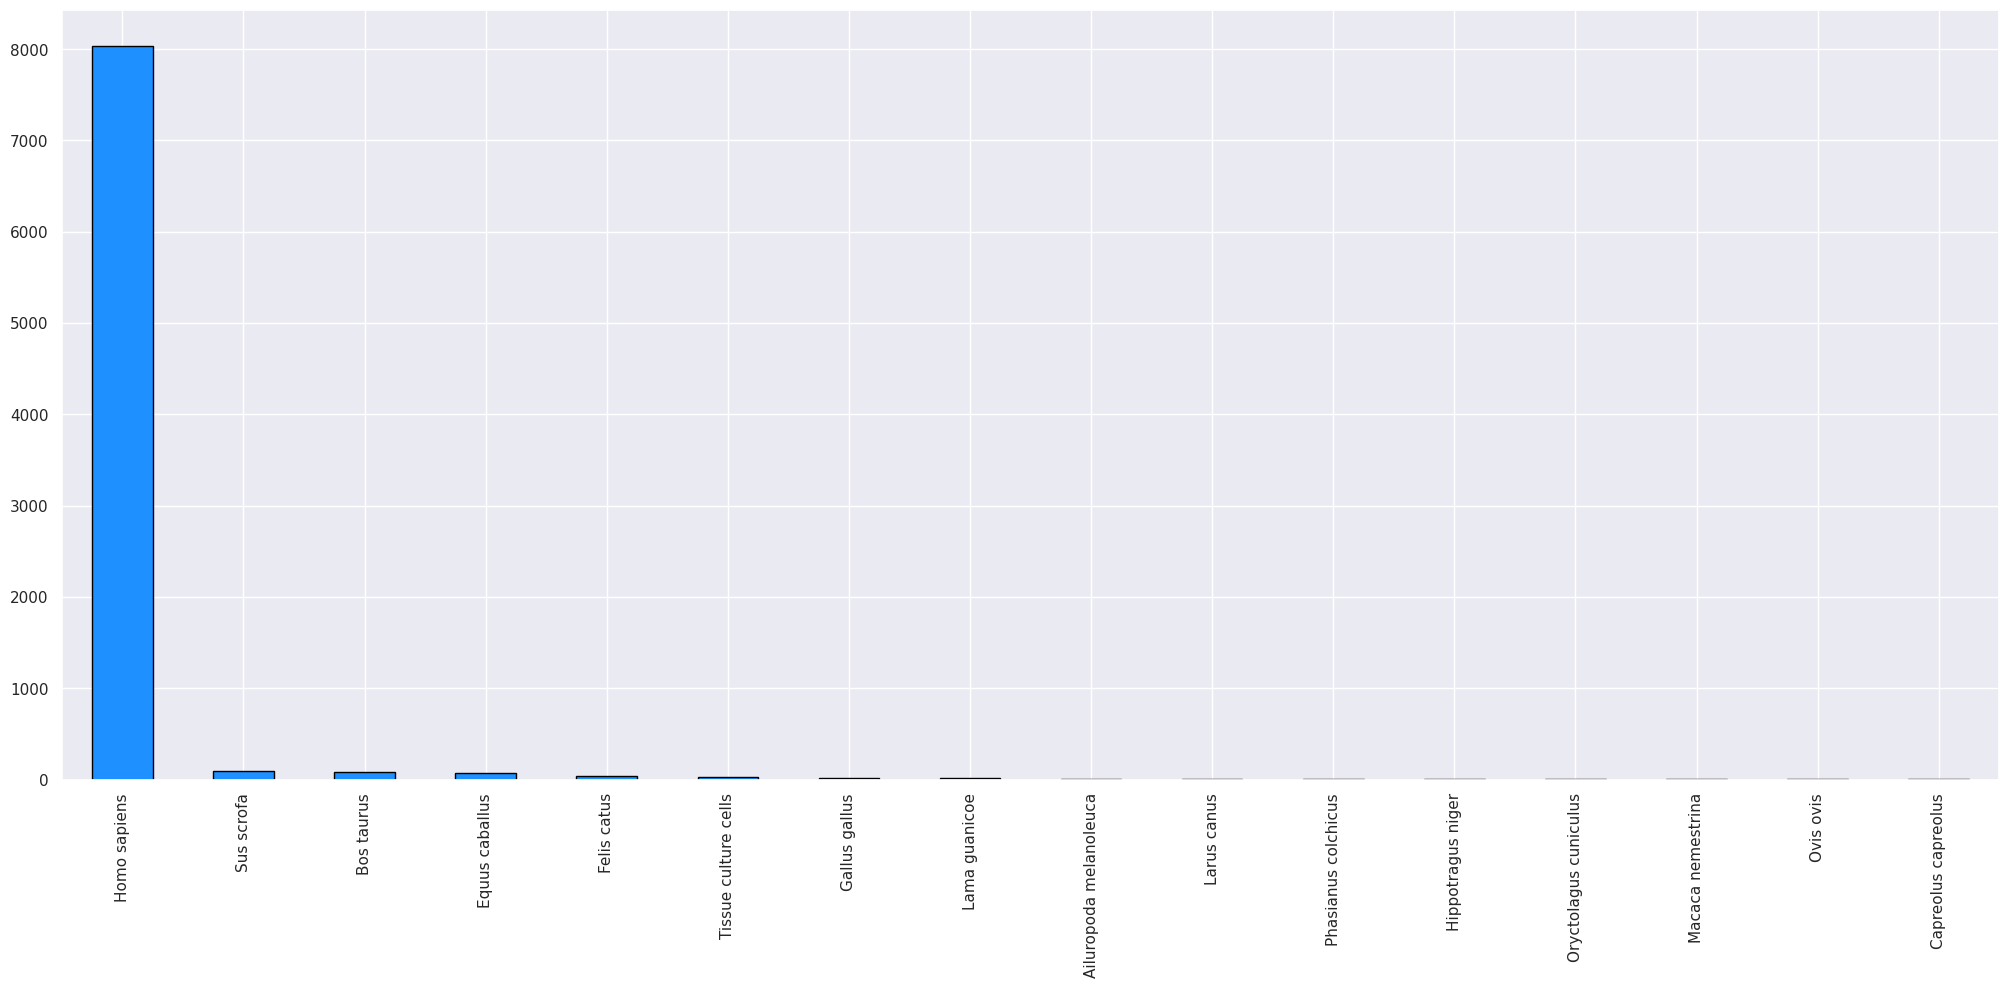

In [ ]:
#Vizualizar los Host presentes
print (Host)
sns.set_theme()
Host.plot(kind = 'bar', color = 'dodgerblue', figsize=(25, 10),edgecolor = 'black') 